In [23]:
from matplotlib.pyplot import plot
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,classification_report

In [24]:
data = pd.read_csv("bankloan.csv")
data

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [25]:
data = data.drop(columns = ['ID', 'ZIP.Code'])
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [26]:
data.shape

(5000, 12)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal.Loan       5000 non-null   int64  
 8   Securities.Account  5000 non-null   int64  
 9   CD.Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal.Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities.Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD.Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [29]:
data.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

<Axes: xlabel='Personal.Loan', ylabel='count'>

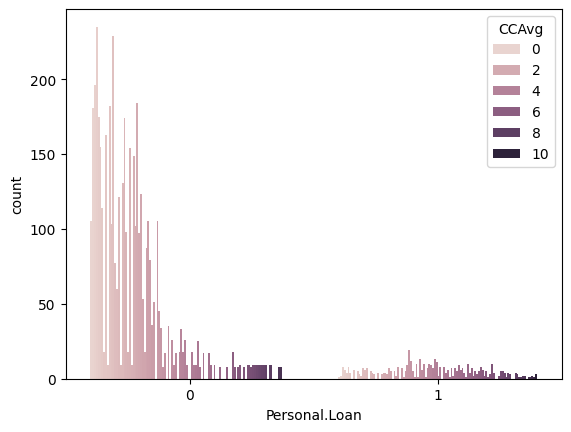

In [30]:
sns.countplot(
    data = data,
    x = "Personal.Loan",
    hue = "CCAvg"
)

<Axes: xlabel='Personal.Loan', ylabel='Count'>

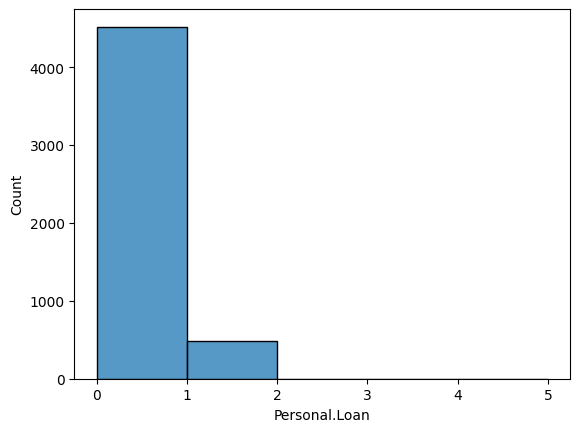

In [31]:
sns.histplot(data["Personal.Loan"],bins=range(0,6))

In [32]:
def remove_outliers(data,col):
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)

  IQR = Q3-Q1

  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3+1.5*IQR

  filtered_data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
  return filtered_data

In [33]:
filtered_data = remove_outliers(data, 'Age')
filtered_data = remove_outliers(data, 'Experience')
filtered_data = remove_outliers(data, 'Income')
filtered_data = remove_outliers(data, 'Family')
filtered_data = remove_outliers(data, 'CCAvg')
filtered_data = remove_outliers(data, 'Education')
filtered_data = remove_outliers(data, 'Mortgage')
filtered_data = remove_outliers(data, 'Securities.Account')
filtered_data = remove_outliers(data, 'CD.Account')
filtered_data = remove_outliers(data, 'Online')
filtered_data = remove_outliers(data, 'CreditCard')

In [34]:
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [35]:
X = data.drop(columns=['Personal.Loan']) 
y = data['Personal.Loan']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size = 0.3,random_state = 42
)

In [37]:
X_train

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities.Account,CD.Account,Online,CreditCard
1840,55,25,23,4,0.4,3,88,0,0,0,0
2115,57,31,30,3,1.4,1,0,0,0,0,0
4437,63,38,63,2,1.5,1,0,0,0,1,0
1146,31,7,71,1,0.1,1,78,1,0,0,0
2486,61,36,130,1,1.3,1,257,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4426,33,8,140,1,4.6,1,0,0,0,1,0
466,25,0,13,2,0.9,3,0,0,0,1,0
3092,43,18,113,2,0.4,1,325,1,0,0,0
3772,35,10,152,2,3.0,1,0,0,0,1,0


In [38]:
X_test

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities.Account,CD.Account,Online,CreditCard
1501,30,4,35,2,0.3,2,0,1,0,0,1
2586,47,23,149,4,6.1,1,0,0,0,0,1
2653,30,5,121,2,3.1,1,408,0,0,1,0
1055,31,6,62,1,1.0,1,0,1,0,1,0
705,62,36,30,3,0.7,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3563,53,27,139,1,0.9,3,0,0,0,0,0
1538,55,30,34,4,0.1,3,157,0,0,1,0
1837,43,18,103,3,1.0,1,180,0,0,1,1
2380,40,16,50,2,0.6,3,0,0,0,0,0


In [39]:
y_train

1840    0
2115    0
4437    0
1146    0
2486    0
       ..
4426    0
466     0
3092    0
3772    0
860     0
Name: Personal.Loan, Length: 3500, dtype: int64

In [40]:
y_test

1501    0
2586    1
2653    0
1055    0
705     0
       ..
3563    1
1538    0
1837    0
2380    0
1912    1
Name: Personal.Loan, Length: 1500, dtype: int64

In [48]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [42]:
y_pred_rf = random_forest.predict(X_test)
print("Random Forest Performance")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1343
           1       0.99      0.89      0.94       157

    accuracy                           0.99      1500
   macro avg       0.99      0.94      0.96      1500
weighted avg       0.99      0.99      0.99      1500



In [43]:
rf_cv_scores = cross_val_score(random_forest, X, y, cv=5, scoring='accuracy')
print("Random Forest Cross-validation Scores: ", rf_cv_scores)
print(f"Mean Cross-validation Accuracy (Random Forest): {rf_cv_scores.mean():.2f}")

Random Forest Cross-validation Scores:  [0.987 0.984 0.985 0.991 0.989]
Mean Cross-validation Accuracy (Random Forest): 0.99


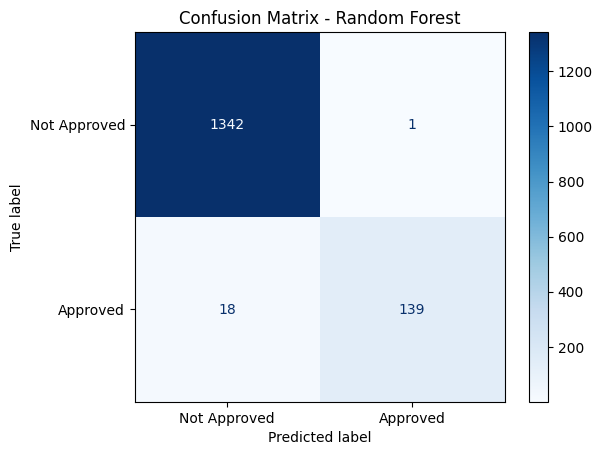

In [44]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=['Not Approved', 'Approved'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

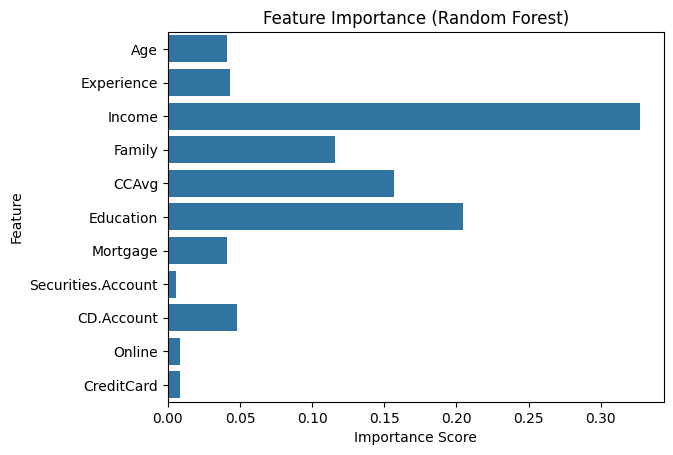

In [45]:
feature_importances = random_forest.feature_importances_
sns.barplot(x=feature_importances, y=X.columns)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

IndexError: list index out of range

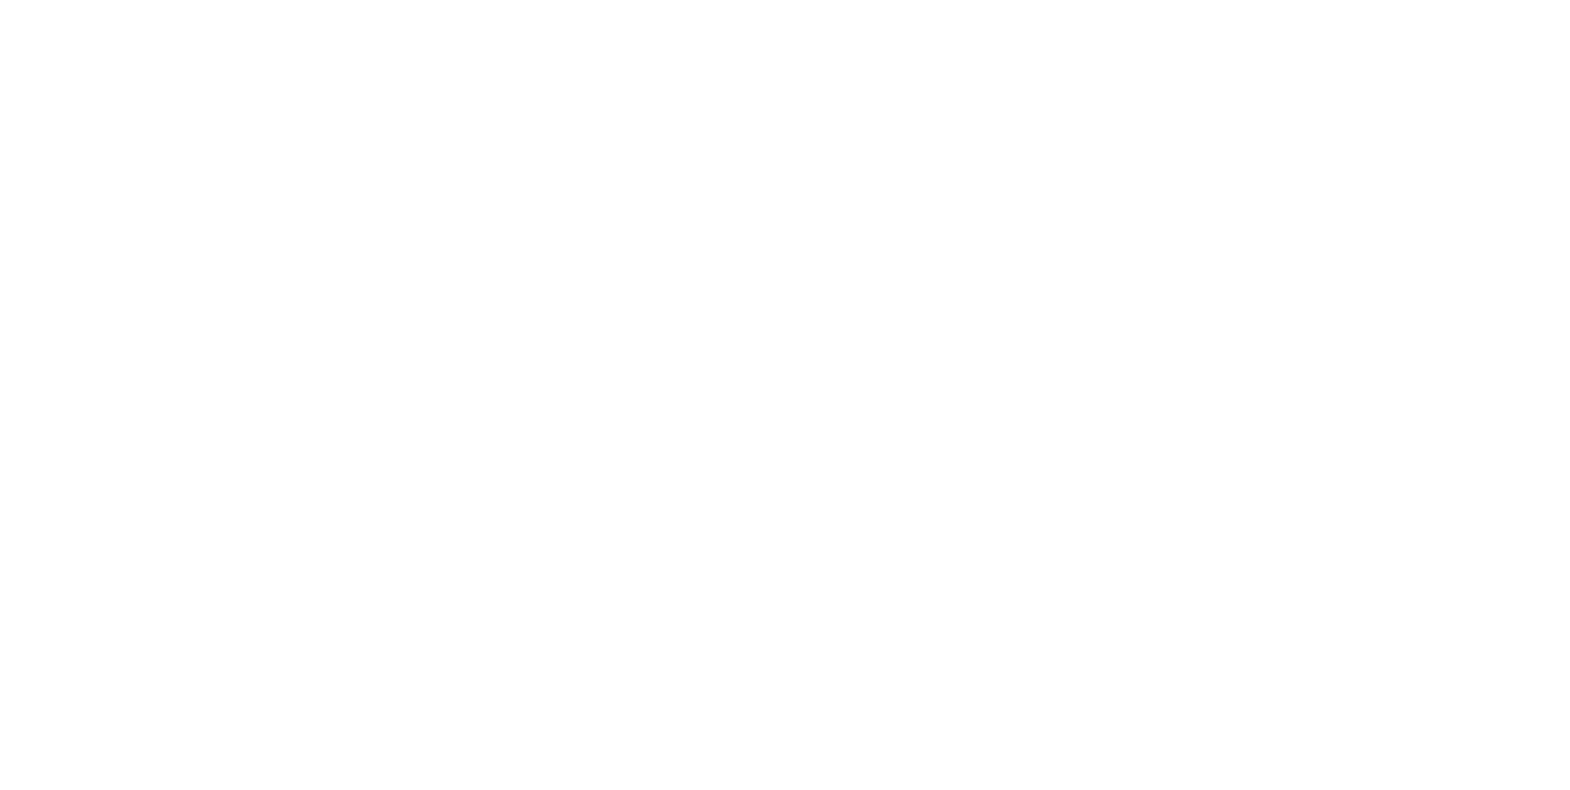

In [54]:

first_tree = random_forest.estimators_[1]

plt.figure(figsize=(20, 10))
tree.plot_tree(first_tree, filled=True, rounded=True, feature_names=['Age', 'Online'])
plt.title("Visualization of the First Tree in the Random Forest")
plt.show()